## CSV to `GeoDataFrame`

Let's start importing packages and updating viewing options:

In [2]:
import os

import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype
import geopandas as gpd
import matplotlib.pyplot as plt


# Display all columns when looking at dataframes
pd.set_option("display.max.columns", None)

In [3]:
# Import power plants data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)

# Simpify column names
power_plants.columns = power_plants.columns.str.lower()

# Drop first column
power_plants = power_plants.drop(columns='unnamed: 0')

power_plants.head(3)

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude
0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900


In [4]:
# Create points from latitude and longitude
points = gpd.points_from_xy(power_plants.longitude, 
                            power_plants.latitude)

# Create geodataframe
power_plants = gpd.GeoDataFrame(power_plants,    # Data
                                geometry=points, # Specify geometry column
                                crs='EPSG:4269'  # Specify CRS
                                )

Remember we are working with two datasets

In [5]:
power_plants.head()

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722,POINT (-160.49722 55.33972)
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665,POINT (-87.35682 33.45867)
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900,POINT (-88.01030 31.00690)
3,11573,4,Walter Bouldin Dam,195,Alabama Power Co,Electric Utility,750 Bouldin Dam Road,Wetumpka,Elmore,Alabama,36092.0,hydroelectric,Hydroelectric = 224.1 MW,Conventional Hydroelectric,225.0,224.1,NaN,NaN,NaN,NaN,224.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-86.283056,32.583889,POINT (-86.28306 32.58389)
4,11574,9,Copper,5701,El Paso Electric Co,Electric Utility,651 Hawkins Blvd.,El Paso,El Paso,Texas,79915.0,natural gas,Natural Gas = 63 MW,Natural Gas Fired Combustion Turbine,86.9,63.0,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-106.375000,31.756900,POINT (-106.37500 31.75690)


<AxesSubplot:>

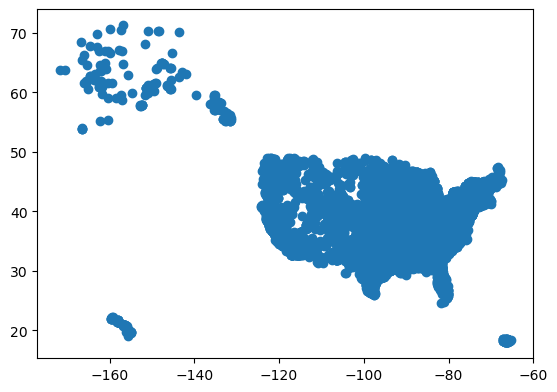

In [6]:
power_plants.plot()

## f-strings

So far we have printed variables using string concatenation inside the print() function: we use commas to separate every variable and string that we want to print. Example:

In [7]:
print('CRS', power_plants.crs)

CRS EPSG:4269


Another popular way to mix variables and strings in a print statement is by creating an f-string, stands for formatting string

simplest syntax

fsome text `{replace}`
where replace can be a variable, an expression, a function or method call

In [8]:
# Check what is the ellipsoid
f"ellipsoid {power_plants.crs.ellipsoid}"

'ellipsoid GRS 1980'

In [9]:
# Use f strings inside the print function
print(f"datum: {power_plants.crs.datum}")

datum: North American Datum 1983


In [10]:
# set the label width to 25 characters, aligning the answers
print(f"{'Is the CRS geographic?': <25} {power_plants.crs.is_geographic}")

Is the CRS geographic?    True


In [11]:
print(f"{'Is the CRS projected?': <25} {power_plants.crs.is_projected}")

Is the CRS projected?     False


In [12]:
os.getcwd()

'/Users/kjwong/MEDS/eds_220_enviro_data/eds220-2024-in-class'

In [15]:
# create absolute file path
fp = os.path.join('/', 'courses', 'EDS220',
                 'data',
                 'tl_2022_us_state',
                 'tl_2022_us_state.shp')

states = gpd.read_file(fp)

# simplify column names
states.columns = states.columns.str.lower()

states.head()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/share/proj failed


,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206244837557,18937184315,+46.3159573,-094.1996043,"POLYGON ((-95.31989 48.99892, -95.31747 48.998..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151771744,6979295311,+38.9466584,-076.6744939,"POLYGON ((-75.75600 39.24607, -75.75579 39.243..."


epsg:4269


<AxesSubplot:>

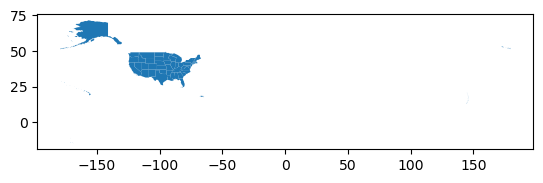

In [16]:
print(states.crs)
states.plot()

`for` loops

It can be easier to work with the codes as numbers instead of strings, let's update the corresponding columns in the geo-dataframe: `region`, `division`, `statefp`

First thing, check if these columns are strings

In [17]:
print(f"region is string dtype? {is_string_dtype(states['region'])}")
print(f"division is string dtype? {is_string_dtype(states['division'])}")
print(f"statefp is string dtype? {is_string_dtype(states['statefp'])}")

region is string dtype? True
division is string dtype? True
statefp is string dtype? True


This is inconvenient because it repeats the same piece of code, only changing the column name Instead using for loop allows us to succinctly print the same info

In [ ]:
code_cols = ['region', 'division', 'statefp']

# check whether codes columns are strings
for column in code_cols:
    print(f"{column} is string dtype? {is_string_dtype(states[column])}")

`for` loops execute a block of code a fixed number of times, iterating over a set of objects. In this case, we iterate over the list of column names

**DRY code**

DRY = don't repeat yourself is a core programming principle that encourages reducing redundancy and consolidating repeated logic. If you need to repeat the "same" code more than twice, you probably need a for loop

Next, update data types of the code columns to be integers. This time we are going to verify the data type of the column using the is_numeric_dtype() and assert statement:

In [ ]:
# Update code_columns into integers
for column in code_cols:
    states[column] = states[column].astype('int')
    assert is_numeric_dtype(states[column]) # chck the conversion


The `assert` keyword does nothing if the expression next to it evaluates to true

if the expression evaluates to false, then assert raises an `AssertionError` and stops your code from running

In [ ]:
# does nothing if statement is true
assert 2 + 2 == 4

In [ ]:
# gives error if statement is false
assert 2 + 2 == 3

## Data selection

for this lesson, we want to use only the contiguous states. The states geodataframe covers a bigger extension

In [ ]:
states.plot()

## Check-in

- what are the unique values for region, division, or state codes in the data
- which codes should we select to keep only states in the continuous US?

In [ ]:
for column in code_cols:
    print(f"{column}'s unique values' {(states[column]).unique()}")

In [67]:

# Select contiguous US states
contiguous = states[ (states.region !=9) & (~states.statefp.isin([2,15]))]

The `~` symbol is use in python to negate the statement

In [68]:
power_plants = power_plants[~power_plants.state.isin(['Puerto Rico', 'Hawaii', 'Alaska'])]

In [69]:
contiguous.crs == power_plants.crs

True

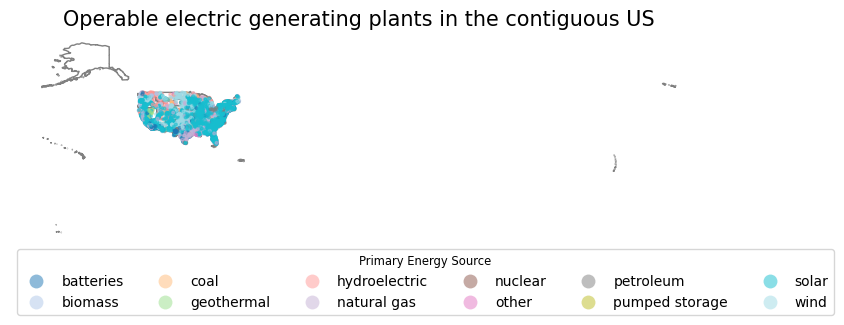

In [70]:
fig, ax = plt.subplots(figsize=(9, 5)) # Update figure size

# remove axis for a cleaner map
ax.axis('off')

ax.set_title('Operable electric generating plants in the contiguous US', fontsize=15)
contiguous.plot(ax=ax,
               color ='none',
               edgecolor='grey')

power_plants.plot(ax=ax,
                 column="primsource", # color by values in this column
                  legend =True,
                  markersize=4,
                  cmap='tab20',
                  alpha=0.5,
                 legend_kwds={ # kwds stands for keywords
                    'title':'Primary Energy Source',
                     'title_fontsize': 'small',
                     'loc': 'upper left',
                     'bbox_to_anchor': (0,0),
                     'ncol':6
                 })
plt.show()

We controlled the legend location using `loc` and `bbox_to_anchor` in the `legend_kwds`

- `loc` indicates the corner of the legend we want to use for placement
- `bbox_to_anchor` is a tuple with coordinates indicating where to place the corner specified in `loc relative` to the axes.
- Values between 0 and 1 are within the axes.

## `for` with `zip`

Often, we need to iterate simultaneously over two lists (or iterables).

`zip()` is a Python function that allows you to combine two lists so that you can iterate over their elements in pairs. When use in a `for` loop it allows you to process elements of each list together.

Example:

In [8]:
# Iterate over a single list
numbers = [1,2,3]
for num in numbers:
    print(num)

1
2
3


In [9]:
# Iterate over two lists in pairs using zip()
letters = ['a', 'b', 'c']
for num, letter in zip(numbers, letters):
    print(num, letter)

1 a
2 b
3 c


Example: with `matplotlib`.
A common situation when code gets repeated is when creating subplots.

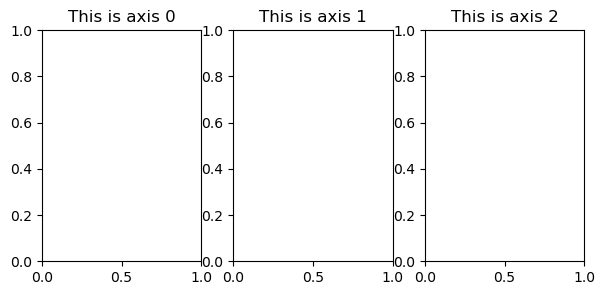

In [13]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (7,3))

axes[0].set_title('This is axis 0')
axes[1].set_title('This is axis 1')
axes[2].set_title('This is axis 2')

plt.show()

## Check in

use `for` and `zip` to create the same subplots and avoid redundancy

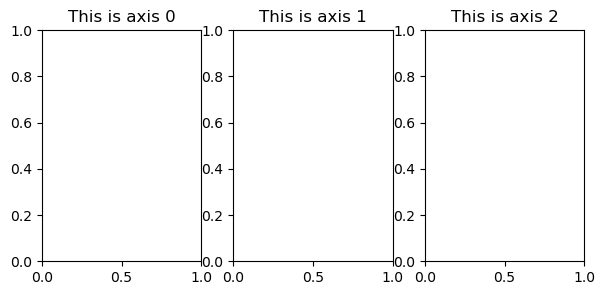

In [23]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (7,3))

for ax, i in zip(axes, [0, 1, 2]):
    ax.set_title(f"This is axis {i}")

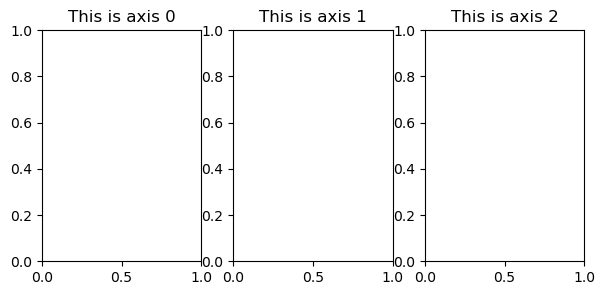

In [26]:
# Another option
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (7,3))

for i in [0, 1, 2]:
    axes[i].set_title(f"This is axis {i}")

plt.show()

In [32]:
power_plants.head()

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722,POINT (-160.49722 55.33972)
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665,POINT (-87.35682 33.45867)
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900,POINT (-88.01030 31.00690)
3,11573,4,Walter Bouldin Dam,195,Alabama Power Co,Electric Utility,750 Bouldin Dam Road,Wetumpka,Elmore,Alabama,36092.0,hydroelectric,Hydroelectric = 224.1 MW,Conventional Hydroelectric,225.0,224.1,NaN,NaN,NaN,NaN,224.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-86.283056,32.583889,POINT (-86.28306 32.58389)
4,11574,9,Copper,5701,El Paso Electric Co,Electric Utility,651 Hawkins Blvd.,El Paso,El Paso,Texas,79915.0,natural gas,Natural Gas = 63 MW,Natural Gas Fired Combustion Turbine,86.9,63.0,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-106.375000,31.756900,POINT (-106.37500 31.75690)


## Exercise

1. Select power plants in California in a variable names `ca_power_plants`

2. Create a list named `top_sources` with California's top 3 electric primary sources

3. Isolate the California state boundary in a variable names `ca_boundary`

4. Recreate plot

In [38]:
ca_power_plants = power_plants[power_plants['state'] == 'California']
ca_power_plants.head()

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
19,11589,34,Rollins,13402,Nevada Irrigation District,IPP Non-CHP,15531 Arrow Head Lane,Colfax,Placer,California,95713.0,hydroelectric,Hydroelectric = 12.1 MW,Conventional Hydroelectric,12.1,12.1,NaN,NaN,NaN,NaN,12.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-120.953341,39.134259,POINT (-120.95334 39.13426)
38,11608,72,Venice Hydro,12397,Metropolitan Water District of S CA,Electric Utility,3815 Sepulveda Blvd,Culver City,Los Angeles,California,90230.0,hydroelectric,Hydroelectric = 10.1 MW,Conventional Hydroelectric,10.1,10.1,NaN,NaN,NaN,NaN,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-118.416800,34.011350,POINT (-118.41680 34.01135)
54,11624,104,J S Eastwood,17609,Southern California Edison Co,Electric Utility,Hwy 168 Sierra National Forest,Shaver Lake,Fresno,California,93664.0,pumped storage,Pumped Storage = 199.8 MW,Hydroelectric Pumped Storage,199.8,199.8,NaN,NaN,NaN,NaN,NaN,199.8,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-119.256700,37.147926,POINT (-119.25670 37.14793)
74,11644,151,McClure,12745,Modesto Irrigation District,Electric Utility,639 S. McClure Rd.,Modesto,Stanislaus,California,95354.0,natural gas,"Natural Gas = 53.5 MW, Petroleum = 53.5 MW",Natural Gas Fired Combustion Turbine; Petroleu...,142.4,107.0,NaN,NaN,NaN,NaN,NaN,NaN,53.5,NaN,53.5,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-120.931390,37.629360,POINT (-120.93139 37.62936)
80,11650,161,Turlock Lake,19281,Turlock Irrigation District,Electric Utility,21642 Davis Road,Hickman,Stanislaus,California,95323.0,hydroelectric,Hydroelectric = 3.3 MW,Conventional Hydroelectric,3.3,3.3,NaN,NaN,NaN,NaN,3.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-120.594678,37.611461,POINT (-120.59468 37.61146)


In [61]:
top_sources = ca_power_plants.primsource.value_counts().head(3).keys().tolist()
top_sources

['solar', 'natural gas', 'hydroelectric']

In [64]:
ca_boundary = states[states['name'] == 'California']

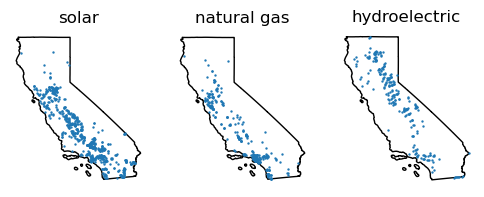

In [75]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (6, 3))

for ax, source in zip(axes, top_sources):
    ca_boundary.plot(ax = ax,
                    color = 'none')
    
    #subset points for sources
    subset = ca_power_plants[ca_power_plants.primsource == source]
    subset.plot(ax = ax, markersize = 0.5)
    ax.set_title(source)
    ax.axis('off')

plt.show()

## Functions

**functions** in Python are blocks of reusable code designed to perform specific tasks, and make your code more modular and organized.

The general syntax:

```python
def function_name(parameter_1, ..., parameter_n):
    """Docstring"""
    <body of the function>
    return value # Depends on function
```

Examples:
A simple functionwith one-line doscstring and no return values.

In [76]:
def greet():
    """Print a greeting message"""
    print('Hello, welcome!')

In [79]:
greet()

Hello, welcome!


Example 2:
a function with a more detailed docstring and return value

In [80]:
def circle_area(radius):
    """
    Calculate the area of a circle given its radius.
    
    Args: 
        radius(float): The radius of the circle
    Returns:
        float: The area of a circle, calculated as pi * radius^2
    """
    area = 3.14159 * radius ** 2
    return area

In [82]:
circle_area(23)

1661.90111

## Example

Going back to our power_plants data frame, let's create a function that will give us the top 3 primary energy sources for a given state.

In [84]:
def top3_sources(state):
    state_power_plants = power_plants[power_plants.state==state]
    top_sources = state_power_plants.primsource.value_counts().index[:3].tolist()
    
    return top_sources

In [85]:
top3_sources('Alabama')

['natural gas', 'hydroelectric', 'biomass']